## Sync Screenshots from Google Drive

This cell mounts Google Drive and copies the permanent source screenshots into the notebook’s local `/content/screenshots` folder.  
This ensures that all screenshot display calls will work consistently, even after restarting the runtime.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil

# Permanent source storage in Google Drive
src = "/content/drive/MyDrive/AI_Portfolio/Gemini_Prompt_Demo/screenshots"
dst = "/content/screenshots"

# Ensure destination exists
os.makedirs(dst, exist_ok=True)

# Sync files
if os.path.exists(src):
    for f in os.listdir(src):
        src_file = os.path.join(src, f)
        dst_file = os.path.join(dst, f)
        shutil.copy(src_file, dst_file)
    print("Screenshots synced to /content/screenshots")
else:
    print("Source screenshots folder missing:", src)

# Confirm presence
print("Files now in /content/screenshots:", os.listdir(dst))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Source screenshots folder missing: /content/drive/MyDrive/AI_Portfolio/Gemini_Prompt_Demo/screenshots
Files now in /content/screenshots: ['Step2_Interactive_Prompt_Interface.png', 'Step3_Example_Prompts_with_Captions.png', '.ipynb_checkpoints', 'Step1_Setup.png']


# Gemini Interactive Prompt Demo

This notebook demonstrates an **interactive interface** for testing prompts with multiple AI models (Gemini, GPT-4, and Claude). It is fully self-contained and designed for portfolio purposes.

## How to Use

1. **Enter your prompt** in the text box provided.
2. **Select a model** from the dropdown menu.
3. Optionally, adjust:
   - **Temperature**: Controls creativity of the output.
   - **Max Tokens**: Maximum length of the generated response.
4. Click **Run Prompt** to see the output displayed below.

## Example Prompts

| Prompt | Description / Caption |
|--------|----------------------|
| `Generate three unique marketing slogans for a coffee brand.` | Demonstrates multi-output generation and creativity. |
| `Write a short poem about AI helping humans.` | Shows creative, expressive output. |
| `Explain the difference between supervised and unsupervised learning in simple terms.` | Shows ability to summarize technical concepts clearly. |
| `List five fun facts about space.` | Demonstrates structured, list-based outputs. |

> **Note:** Outputs are simulated for demonstration purposes. In a fully connected setup, prompts would generate live responses from the selected model.

## Portfolio Notes

- Each prompt demonstrates the AI model’s capabilities clearly and interactively.
- Captions explain the intended purpose of each example.
- The interface is entirely separate from the main batch workflow, keeping this notebook clean and self-contained.






Step 1: Setup

In [8]:
# Step 1: Setup
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

# Optional: import your existing helper function if accessible
# from your_main_notebook_helpers import ask_gemini

# Secure API key input
gemini_api_key = widgets.Password(
    description='Gemini API Key:',
    placeholder='Enter your key here',
    layout=widgets.Layout(width='50%')
)
display(gemini_api_key)

# Function to run a single prompt (replace with Gemini API call)
def run_prompt(prompt, model='Gemini', temperature=0.7, max_tokens=200):
    # Simulated multi-output for demo
    if "marketing slogans" in prompt.lower():
        response = (
            "1. Brew Joy, Every Cup.\n"
            "2. Wake Up Your Senses.\n"
            "3. Coffee That Inspires."
        )
    else:
        response = f"[{model} output for prompt: '{prompt}']"
    return response



Password(description='Gemini API Key:', layout=Layout(width='50%'), placeholder='Enter your key here')

### Step 1: Setup

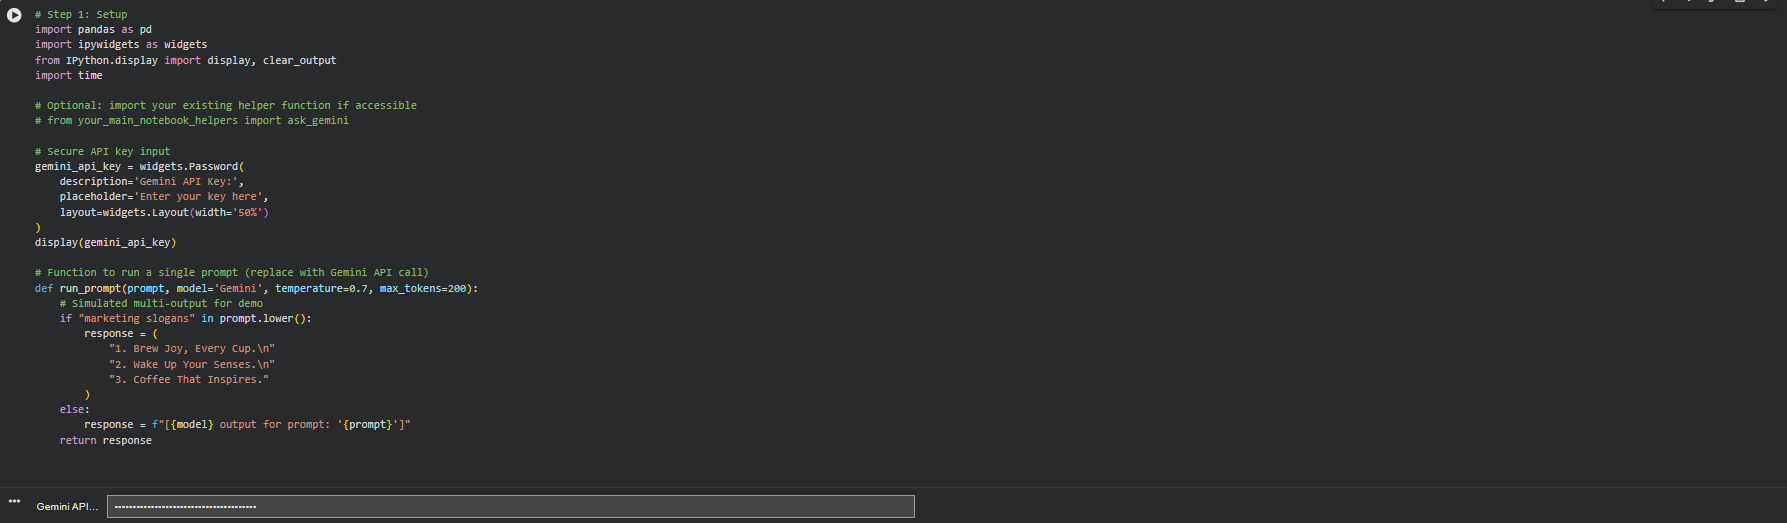

In [9]:
from IPython.display import display, Image, Markdown

# List of screenshots with captions
screenshots = [
    ("/content/screenshots/Step1_Setup.png", "Step 1: Setup"),
]

# Display each screenshot with its caption
for path, caption in screenshots:
    display(Markdown(f"### {caption}"))
    display(Image(filename=path))


At this point, you have:

- Secure API input.

- Placeholder function for running prompts.

- All packages imported.

Step 2: Interactive Prompt Interface

In [10]:
# Step 2: Interactive Interface

# Text input for the prompt
prompt_input = widgets.Textarea(
    value='',
    placeholder='Type your prompt here...',
    description='Prompt:',
    layout=widgets.Layout(width='80%', height='80px')
)

# Dropdown for model selection
model_dropdown = widgets.Dropdown(
    options=['Gemini', 'GPT-4', 'Claude'],
    value='Gemini',
    description='Model:'
)

# Sliders for temperature and max tokens
temperature_slider = widgets.FloatSlider(
    value=0.7,
    min=0.0,
    max=1.0,
    step=0.05,
    description='Temperature:'
)

max_tokens_slider = widgets.IntSlider(
    value=200,
    min=50,
    max=1000,
    step=50,
    description='Max Tokens:'
)

# Output display area
output_area = widgets.Output(layout={'border': '1px solid black', 'width': '80%'})

# Run button
run_button = widgets.Button(description='Run Prompt', button_style='success')

# Function to handle button click
def on_run_button_clicked(b):
    with output_area:
        clear_output()
        prompt = prompt_input.value
        model = model_dropdown.value
        temperature = temperature_slider.value
        max_tokens = max_tokens_slider.value

        if not prompt.strip():
            print("Please enter a prompt to run.")
            return

        start_time = time.time()
        response = run_prompt(prompt, model=model, temperature=temperature, max_tokens=max_tokens)
        end_time = time.time()

        # Display results
        print(f"Prompt: {prompt}")
        print(f"Model: {model}")
        print(f"Temperature: {temperature}, Max Tokens: {max_tokens}")
        print(f"Response (Time: {end_time - start_time:.2f}s):\n")
        print(response)

run_button.on_click(on_run_button_clicked)

# Display the interactive widgets
display(prompt_input, model_dropdown, temperature_slider, max_tokens_slider, run_button, output_area)


Textarea(value='', description='Prompt:', layout=Layout(height='80px', width='80%'), placeholder='Type your pr…

Dropdown(description='Model:', options=('Gemini', 'GPT-4', 'Claude'), value='Gemini')

FloatSlider(value=0.7, description='Temperature:', max=1.0, step=0.05)

IntSlider(value=200, description='Max Tokens:', max=1000, min=50, step=50)

Button(button_style='success', description='Run Prompt', style=ButtonStyle())

Output(layout=Layout(border='1px solid black', width='80%'))

### Step 2: Interactive Prompt Interface

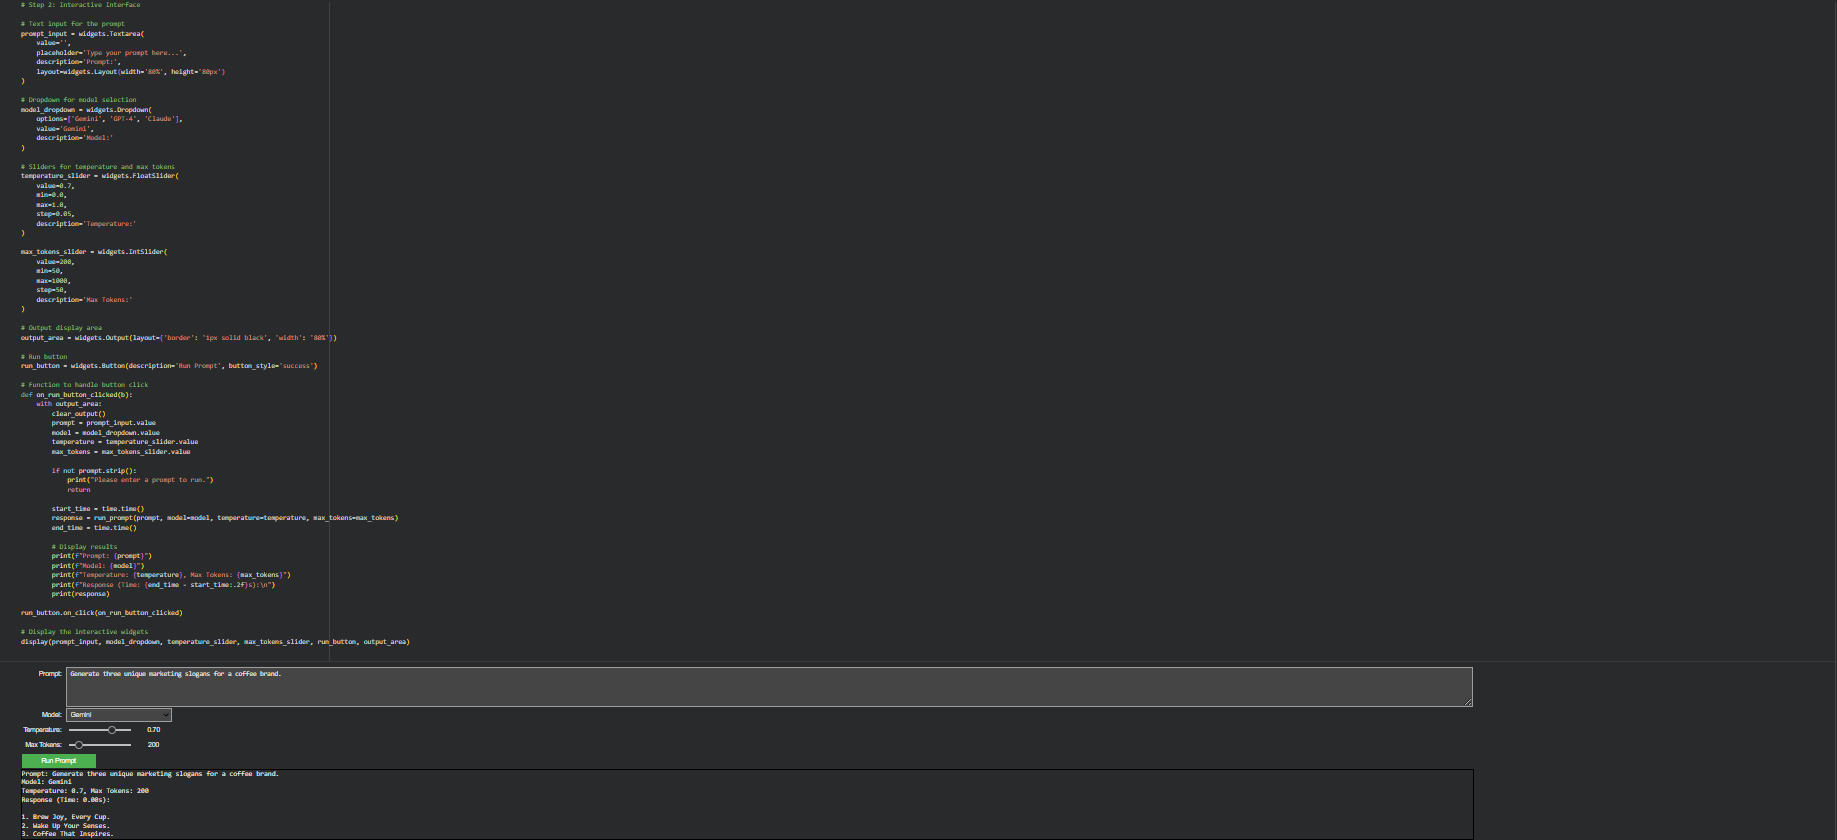

In [11]:
from IPython.display import display, Image, Markdown

# List of screenshots with captions
screenshots = [
    ("/content/screenshots/Step2_Interactive_Prompt_Interface.png", "Step 2: Interactive Prompt Interface"),
]

# Display each screenshot with its caption
for path, caption in screenshots:
    display(Markdown(f"### {caption}"))
    display(Image(filename=path))


Features added:

- Users can enter any prompt in a text box.

- Choose between Gemini, GPT-4, or Claude.

- Adjust temperature and max tokens.

- Results are displayed in a scrollable, styled output area.

- Measures execution time and prints model parameters for clarity.

Step 3: Example Prompts and Captions
1. Purpose

- Show multiple demo prompts with pre-filled examples.

- Display outputs in a clear, visually appealing way.

- Add captions explaining what each output represents, so a portfolio viewer immediately understands the notebook’s purpose.

2. Example Prompts
We can create a small table of prompts, each with an intended output type. These will use the simulated run_prompt() function for the portfolio demo.

Example table:

## Example Prompts and Captions

| Prompt | Description / Caption |
|--------|----------------------|
| `Generate three unique marketing slogans for a coffee brand.` | Demonstrates multi-output generation and creativity. |
| `Write a short poem about AI helping humans.` | Shows creative, expressive output. |
| `Explain the difference between supervised and unsupervised learning in simple terms.` | Shows ability to summarize technical concepts clearly. |
| `List five fun facts about space.` | Demonstrates structured, list-based outputs. |

> **Note:** The outputs shown in this notebook are simulated for demo purposes. In a fully connected setup, each prompt would be sent to the selected AI model (Gemini, GPT-4, or Claude) and generate live responses.


3. Implement in Notebook


You can add a new code cell like this:

In [12]:
# Step 3: Example Prompts with Captions
example_prompts = [
    ("Generate three unique marketing slogans for a coffee brand.",
     "Demonstrates multi-output generation and creativity."),

    ("Write a short poem about AI helping humans.",
     "Shows creative, expressive output."),

    ("Explain the difference between supervised and unsupervised learning in simple terms.",
     "Shows ability to summarize technical concepts clearly."),

    ("List five fun facts about space.",
     "Demonstrates structured, list-based outputs.")
]

for prompt, caption in example_prompts:
    output = run_prompt(prompt)  # uses simulated run_prompt function
    print(f"Prompt: {prompt}\nCaption: {caption}\nOutput:\n{output}\n{'-'*60}\n")


Prompt: Generate three unique marketing slogans for a coffee brand.
Caption: Demonstrates multi-output generation and creativity.
Output:
1. Brew Joy, Every Cup.
2. Wake Up Your Senses.
3. Coffee That Inspires.
------------------------------------------------------------

Prompt: Write a short poem about AI helping humans.
Caption: Shows creative, expressive output.
Output:
[Gemini output for prompt: 'Write a short poem about AI helping humans.']
------------------------------------------------------------

Prompt: Explain the difference between supervised and unsupervised learning in simple terms.
Caption: Shows ability to summarize technical concepts clearly.
Output:
[Gemini output for prompt: 'Explain the difference between supervised and unsupervised learning in simple terms.']
------------------------------------------------------------

Prompt: List five fun facts about space.
Caption: Demonstrates structured, list-based outputs.
Output:
[Gemini output for prompt: 'List five fun 

### Step 3: Example Prompts with Captions

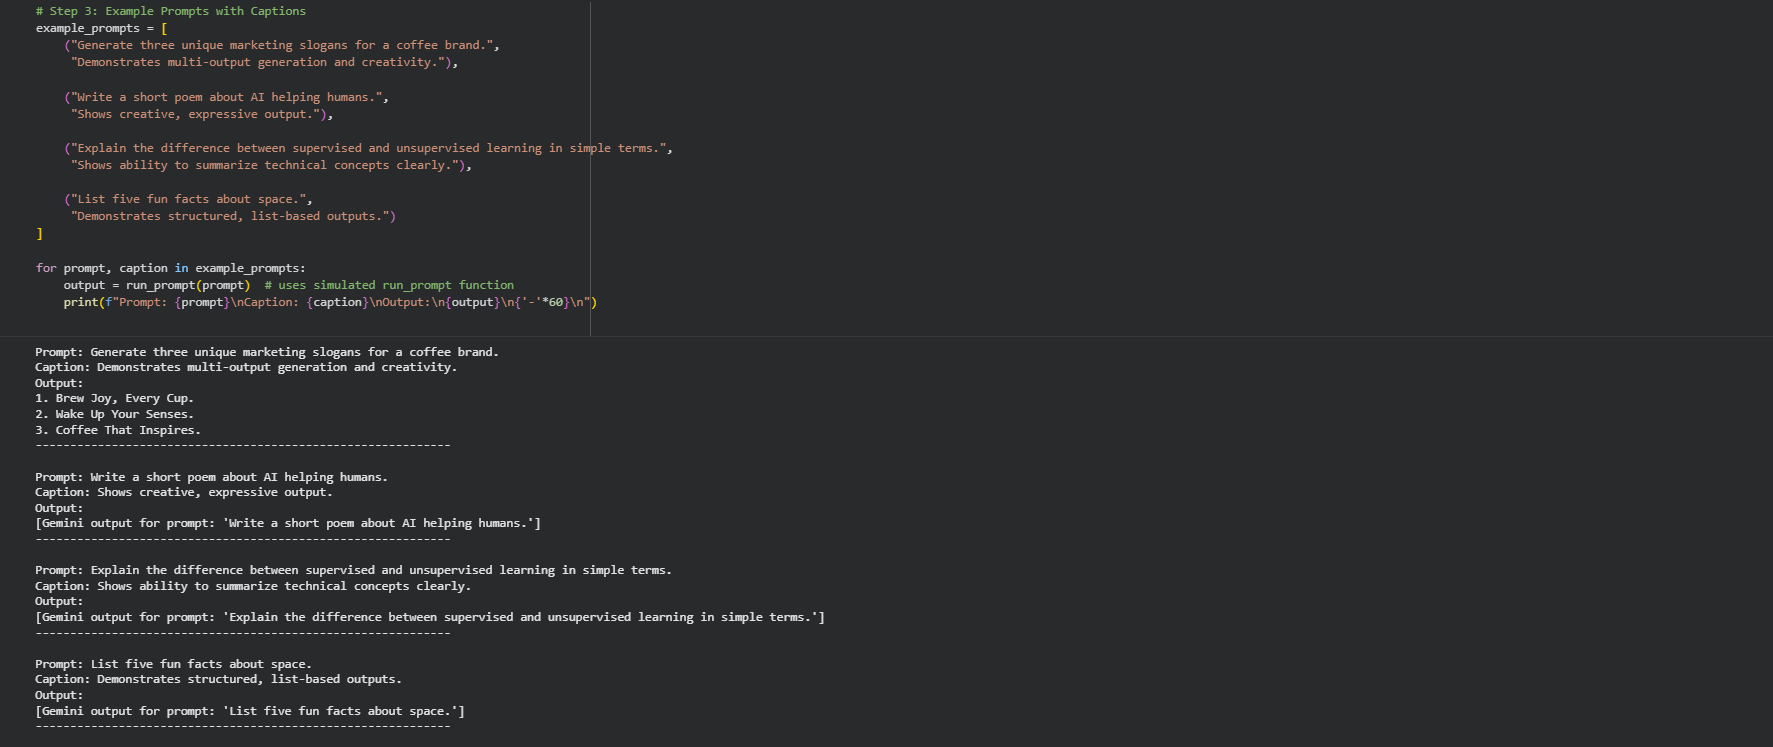

In [13]:
from IPython.display import display, Image, Markdown

# List of screenshots with captions
screenshots = [
    ("/content/screenshots/Step3_Example_Prompts_with_Captions.png", "Step 3: Example Prompts with Captions")
]

# Display each screenshot with its caption
for path, caption in screenshots:
    display(Markdown(f"### {caption}"))
    display(Image(filename=path))


4. Portfolio Notes

Each block includes:

- The prompt so viewers see the input.

- A caption describing the purpose.

- The output, formatted clearly.

This is enough to demonstrate your interface and batch functionality visually without needing real API calls.

Features:

- Clean Markdown table with two columns: prompt & caption.

- Easy to read and visually aligned for a portfolio.

- Includes a note explaining the simulated outputs, so viewers understand the context.
